In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [7]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# About - Dataset:

The dataset provided for this project is focused on heart failure, a critical medical condition characterized by
the heart's inability to pump blood effectively, leading to inadequate circulation throughout the body. Here's an
overview of the dataset:

# Title: Heart Failure Clinical Records Dataset

Source: The dataset was collected at the Faisalabad Institute of Cardiology and the Allied Hospital in
Faisalabad, Punjab, Pakistan, during the period of April to December in 2015. It was later made available on
Kaggle.


Description: The dataset comprises medical records of 299 patients diagnosed with heart failure. These records
include various clinical, body, and lifestyle information of the patients. The dataset encompasses 13 features,
providing insights into the patients' health status and potential risk factors for heart failure.

# Features :

Age: The age of the patient (numeric).

Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

Platelets: Platelet count in the blood (numeric).

Serum Creatinine: Level of creatinine in the blood (numeric).

Serum Sodium: Level of sodium in the blood (numeric).

Sex: Gender of the patient (binary: 0 for female, 1 for male).

Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

Time: Follow-up period (in days) for the patient's condition (numeric).

# Death Event:

Indicates whether the patient died during the follow-up period (binary: 0 for no, 1 for yes).

1. What is the distribution of age among heart failure patients in the dataset?

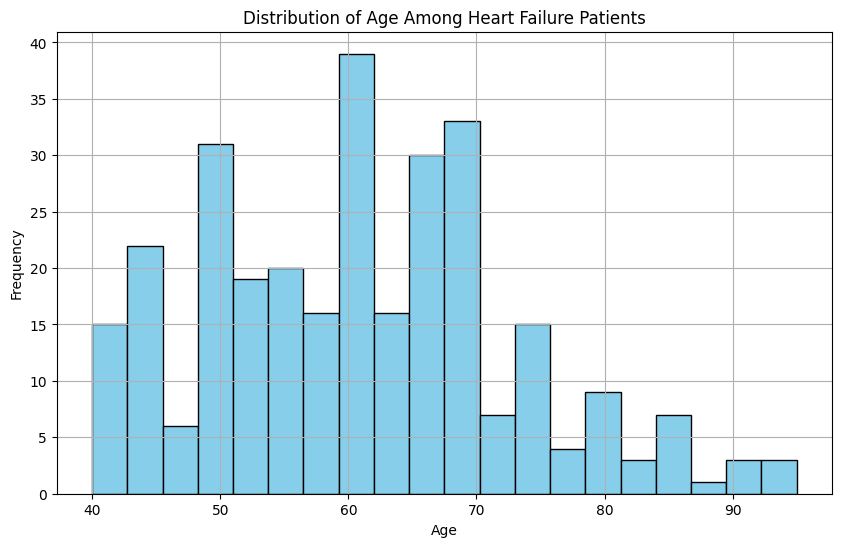

In [9]:
# Plot the distribution of age
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

2. How does the death rate vary with age?

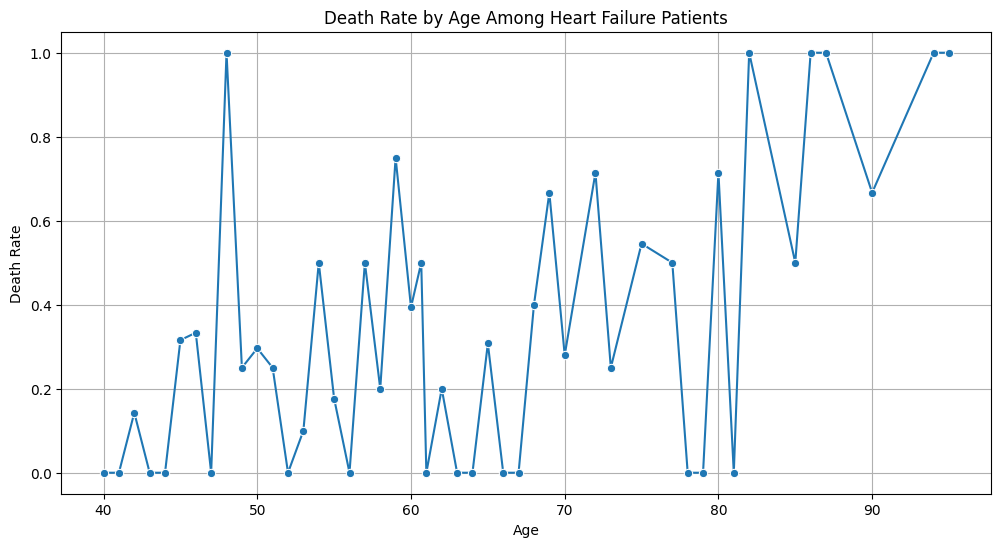

In [13]:
age_death_rate = data.groupby('age')['DEATH_EVENT'].mean()

# Plot the death rate by age
plt.figure(figsize=(12, 6))
sns.lineplot(x=age_death_rate.index, y=age_death_rate.values, marker='o')
plt.title('Death Rate by Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.grid(True)
plt.show()

3. What is the percentage of male and female patients in the dataset?


In [14]:
gender_counts = data['sex'].value_counts(normalize=True) * 100
gender_counts

sex
1    64.882943
0    35.117057
Name: proportion, dtype: float64

4. How does th5 platelet count vary among different age groups?

C:\Users\adith\AppData\Local\Temp\ipykernel_34224\1936248702.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platelet_count_by_age_group = data.groupby('age_group')['platelets'].mean()
C:\Users\adith\AppData\Local\Temp\ipykernel_34224\1936248702.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platelet_count_by_age_group.index, y=platelet_count_by_age_group.values, palette='viridis')


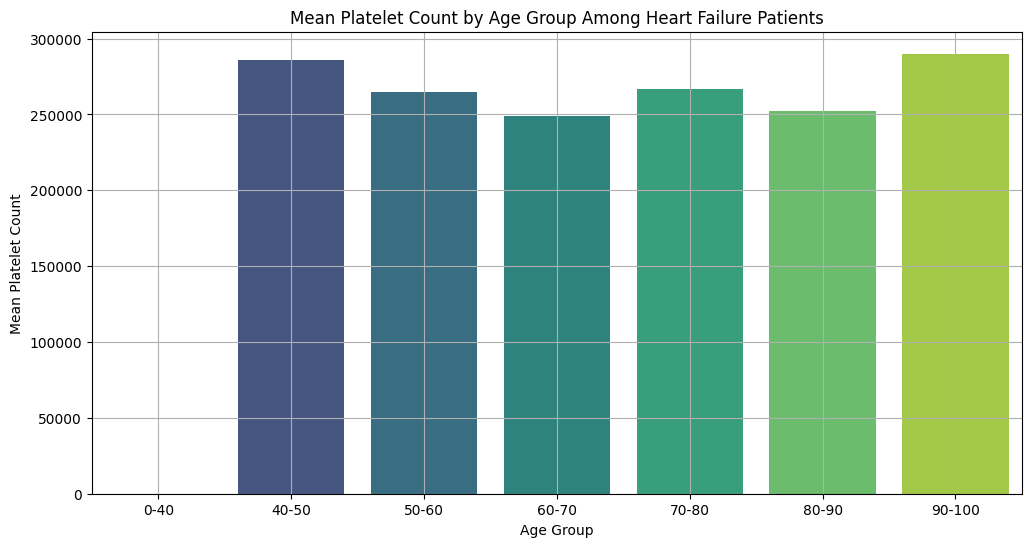

In [15]:
# Define age groups
bins = [0, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Calculate the mean platelet count for each age group
platelet_count_by_age_group = data.groupby('age_group')['platelets'].mean()

# Plot the platelet count by age group
plt.figure(figsize=(12, 6))
sns.barplot(x=platelet_count_by_age_group.index, y=platelet_count_by_age_group.values, palette='viridis')
plt.title('Mean Platelet Count by Age Group Among Heart Failure Patients')
plt.xlabel('Age Group')
plt.ylabel('Mean Platelet Count')
plt.grid(True)
plt.show()


5. Is there a correlation between creatinine and sodium levels in the blood?

In [16]:
# Calculate the Pearson correlation coefficient between creatinine and sodium levels
correlation = data['creatinine_phosphokinase'].corr(data['serum_sodium'])

print(f"The correlation between creatinine and sodium levels in the blood is: {correlation}")


The correlation between creatinine and sodium levels in the blood is: 0.05955015583372572


6. How does the prevalence of high blood pressure differ between male and female patients?

In [17]:
# Calculate the prevalence of high blood pressure in male and female patients
high_blood_pressure_by_gender = data.groupby('sex')['high_blood_pressure'].mean() * 100

print("Prevalence of High Blood Pressure:")
print(f"Male: {high_blood_pressure_by_gender[1]:.2f}%")
print(f"Female: {high_blood_pressure_by_gender[0]:.2f}%")

Prevalence of High Blood Pressure:
Male: 31.44%
Female: 41.90%


7. What is the relationship between smoking habits and the occurrence of heart failure?

In [18]:
# Calculate the percentage of heart failure occurrences in smokers and non-smokers
heart_failure_by_smoking = data.groupby('smoking')['DEATH_EVENT'].mean() * 100

print("Percentage of Heart Failure Occurrence:")
print(f"Non-Smokers: {heart_failure_by_smoking[0]:.2f}%")
print(f"Smokers: {heart_failure_by_smoking[1]:.2f}%")

Percentage of Heart Failure Occurrence:
Non-Smokers: 32.51%
Smokers: 31.25%


8. Are there any noticeable patterns in the distribution of death events across different age groups?

C:\Users\adith\AppData\Local\Temp\ipykernel_34224\3919836321.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_event_by_age_group = data.groupby('age_group')['DEATH_EVENT'].mean() * 100
C:\Users\adith\AppData\Local\Temp\ipykernel_34224\3919836321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=death_event_by_age_group.index, y=death_event_by_age_group.values, palette='viridis')


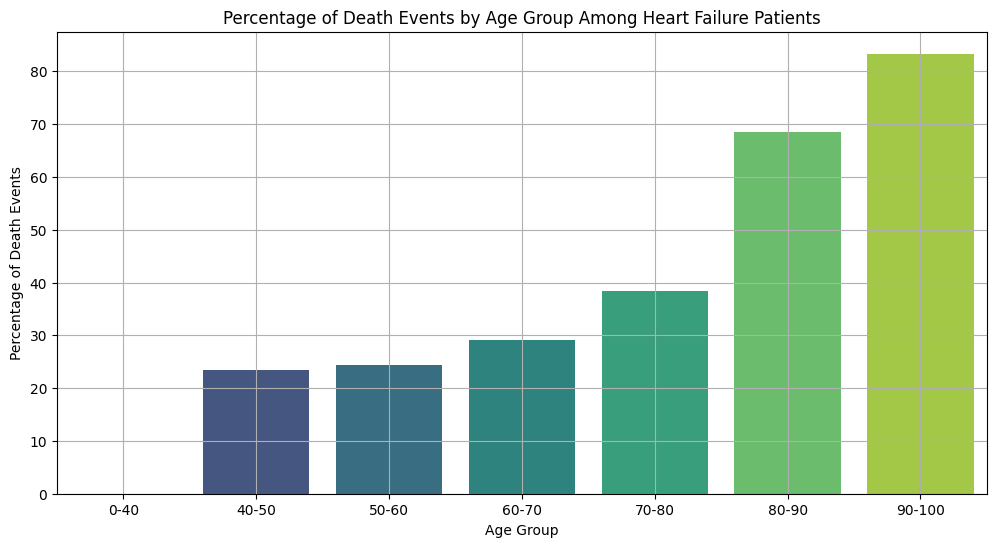

age_group
0-40            NaN
40-50     23.404255
50-60     24.390244
60-70     29.032258
70-80     38.461538
80-90     68.421053
90-100    83.333333
Name: DEATH_EVENT, dtype: float64


In [19]:
# Define age groups
bins = [0, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Calculate the percentage of death events in each age group
death_event_by_age_group = data.groupby('age_group')['DEATH_EVENT'].mean() * 100

# Plot the percentage of death events by age group
plt.figure(figsize=(12, 6))
sns.barplot(x=death_event_by_age_group.index, y=death_event_by_age_group.values, palette='viridis')
plt.title('Percentage of Death Events by Age Group Among Heart Failure Patients')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Death Events')
plt.grid(True)
plt.show()

print(death_event_by_age_group)

9. Is there any significant difference in ejection fraction between patients with and without diabetes?

In [9]:
# Separate the data into two groups
diabetes = data[data['diabetes'] == 1]['ejection_fraction']
no_diabetes = data[data['diabetes'] == 0]['ejection_fraction']

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(diabetes, no_diabetes)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.08358970647234736, P-value: 0.9334389630426103


10. How does the serum creatinine level vary between patients who survived and those who did not?

In [8]:
survived = data[data['DEATH_EVENT'] == 0]['serum_creatinine']
not_survived = data[data['DEATH_EVENT'] == 1]['serum_creatinine']

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(survived, not_survived)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -5.306457599754319, P-value: 2.1901978548979685e-07
